In [15]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# 1. CSV 파일에 접근

In [16]:
# CSV 파일에 접근
maml_norm_info = pd.read_csv('../MAML_filter128/MAML_filter128_inner_loop.csv')
arbiter_norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_7173/MAML+Arbiter_5way_5shot_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_norm_info_train = maml_norm_info[maml_norm_info['phase']=='train']
arbiter_norm_info_train= arbiter_norm_info[arbiter_norm_info['phase']=='train']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
arbiter_norm_info_train

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
0,0,train,0,0.683128,0.000249,26.225546,0.683128,1.350074e-04,0.000458,-0.000921,...,0.010756,0.006019,9.057911e-06,0.000011,2.215746,-0.000002,20.008957,0.000866,-0.000010,4.742444e-07
1,0,train,1,0.663317,-0.000258,26.043592,0.663317,1.272822e-04,0.000521,-0.000919,...,0.022005,0.012323,3.796688e-05,0.000011,2.240315,-0.000006,20.008949,0.000866,-0.000010,3.162648e-06
2,0,train,2,0.646235,-0.000763,26.769913,0.646235,1.202924e-04,0.004831,-0.000911,...,0.033656,0.018871,8.902679e-05,0.000011,2.268607,-0.000006,20.008951,0.000866,-0.000010,2.743962e-06
3,0,train,3,0.629445,-0.000717,26.017635,0.629445,1.141601e-04,0.004502,-0.000904,...,0.045668,0.025666,1.646883e-04,0.000011,2.304932,-0.000005,20.008965,0.000866,-0.000010,1.881302e-06
4,0,train,4,0.631344,-0.000482,24.916399,0.631344,1.151350e-04,0.002020,-0.000899,...,0.057397,0.032411,2.626196e-04,0.000012,2.350882,0.000008,20.008987,0.000866,-0.000010,4.760425e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796995,49999,train,0,0.002345,-0.000002,0.083645,0.002345,1.587795e-09,0.000031,-0.000514,...,0.003945,0.002112,8.371006e-07,0.006721,55.742352,-0.000146,24.355978,0.001279,-0.002095,3.157757e-06
796996,49999,train,1,0.003765,0.000003,0.042224,0.003765,4.092449e-09,0.000108,-0.000514,...,0.003945,0.002112,8.370998e-07,0.004656,46.397221,-0.000520,24.360435,0.001279,-0.002090,5.800872e-05
796997,49999,train,2,0.009522,0.000010,0.104654,0.009522,2.614857e-08,0.000764,-0.000514,...,0.003945,0.002112,8.370998e-07,0.005795,51.761417,-0.000574,24.365953,0.001280,-0.002084,5.678350e-05
796998,49999,train,3,0.044315,0.000044,0.478993,0.044315,5.664256e-07,0.002961,-0.000514,...,0.003945,0.002112,8.370998e-07,0.008558,62.906277,-0.000889,24.374077,0.001281,-0.002075,9.232335e-05


# 2. MAML과 Arbiter의 Step 별 정보

In [18]:
# maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step').mean()
# arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step').mean()
maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step').mean()
arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step').mean()

In [19]:
maml_per_inner_loop_step

,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,layer_dict.conv0.conv.bias_grad_mean,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.017379,512.814066,14.799485,0.070828,0.040614,-0.003273,410.466839,8.884867,0.025460,1.554615e-09,...,0.495206,0.255329,0.018695,0.003990,42.383909,1.211225e-05,93.592131,0.021591,-0.018433,0.000043
1,-0.001841,185.407945,5.378347,0.009560,0.039140,-0.003255,410.472630,8.885045,0.025462,5.344014e-10,...,0.489598,0.253503,0.018396,0.003155,37.707904,-4.602424e-05,93.592126,0.021591,-0.018433,0.000010
2,-0.003275,124.861643,3.567404,0.004004,0.041071,-0.003222,410.472164,8.885133,0.025462,4.206256e-10,...,0.485459,0.250526,0.017951,0.001777,27.951806,-7.854893e-05,93.592349,0.021591,-0.018432,0.000013
3,0.000236,51.191396,1.428790,0.000668,0.030989,-0.003225,410.472674,8.885131,0.025462,-2.654639e-11,...,0.486806,0.251365,0.018078,0.000245,9.734460,5.530916e-06,93.592170,0.021591,-0.018432,0.000010
4,0.000067,18.425753,0.514252,0.000103,0.029413,-0.003225,410.472846,8.885134,0.025462,-7.592787e-12,...,0.486904,0.251434,0.018087,0.000025,2.682568,-1.233220e-07,93.592212,0.021591,-0.018432,0.000018


In [20]:
arbiter_per_inner_loop_step

,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.058234,-0.000003,2.160670,0.058234,0.000018,0.002263,-0.000685,130.445340,2.600052,0.001959,...,0.003537,0.001886,0.000001,0.003058,34.866112,0.000017,22.158798,0.001063,-0.001522,0.000027
1,0.057502,0.000013,2.171426,0.057502,0.000017,0.002285,-0.000686,130.445314,2.600053,0.001959,...,0.003675,0.001959,0.000001,0.003198,35.849839,0.000085,22.162084,0.001063,-0.001523,0.000052
2,0.062028,0.000026,2.279789,0.062028,0.000015,0.003357,-0.000686,130.445294,2.600054,0.001959,...,0.003871,0.002063,0.000002,0.003562,37.642158,0.000193,22.165739,0.001064,-0.001524,0.000118
3,0.082613,0.000037,2.621700,0.082613,0.000015,0.004542,-0.000686,130.445291,2.600055,0.001959,...,0.004100,0.002183,0.000003,0.003903,39.081218,0.000273,22.169741,0.001064,-0.001527,0.000197
4,0.124283,0.000063,3.179652,0.124283,0.000017,0.005366,-0.000687,130.445406,2.600057,0.001959,...,0.004320,0.002299,0.000004,0.003921,39.153050,0.000301,22.173776,0.001065,-0.001530,0.000231


# 3. MAML과 Arbiter의 Iteration 별 정보

In [21]:
maml_gr = maml_norm_info_train.groupby('current_iter').mean()
arbiter_gr = arbiter_norm_info_train.groupby('current_iter').mean()

# 4. Column 정보

In [22]:
arbiter_gr.columns

Index(['num_step', 'layer_dict.conv0.conv.weight_alpha',
       'layer_dict.conv0.conv.weight_grad_mean',
       'layer_dict.conv0.conv.weight_grad_L1norm',
       'layer_dict.conv0.conv.weight_grad_L2norm',
       'layer_dict.conv0.conv.weight_grad_var',
       'layer_dict.conv0.conv.weight_gsnr',
       'layer_dict.conv0.conv.weight_weight_mean',
       'layer_dict.conv0.conv.weight_weight_L1norm',
       'layer_dict.conv0.conv.weight_weight_L2norm',
       ...
       'layer_dict.linear.bias_weight_L1norm',
       'layer_dict.linear.bias_weight_L2norm',
       'layer_dict.linear.bias_weight_var', 'all_grads_var',
       'all_grads_l2norm', 'all_grads_mean', 'all_weights_norm',
       'all_weights_var', 'all_weights_mean', 'gsnr'],
      dtype='object', length=108)

# 5. Gradient Variance

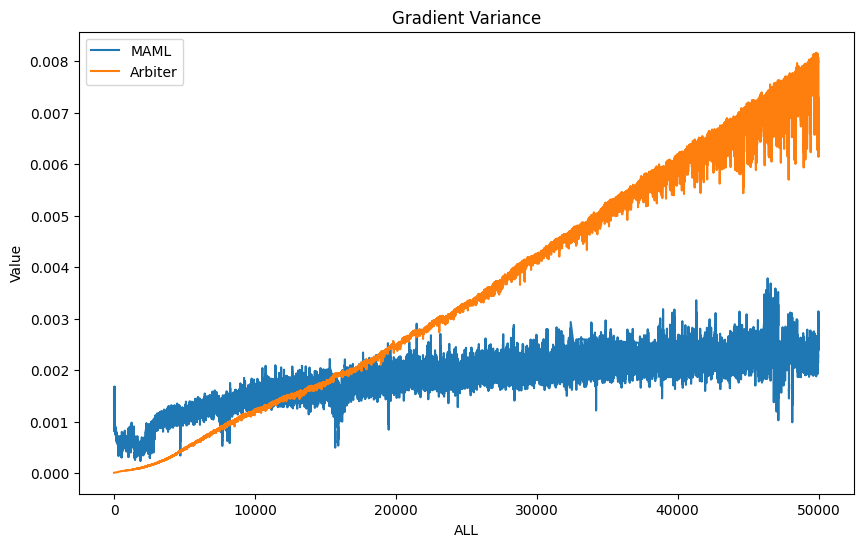

In [23]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_grads_var'], label='MAML')
plt.plot(arbiter_gr['all_grads_var'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

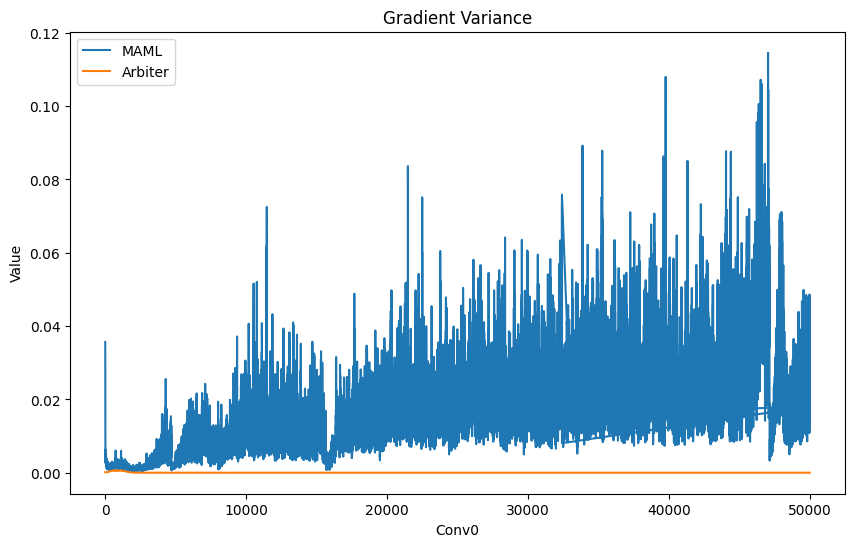

In [24]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv0.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv0.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

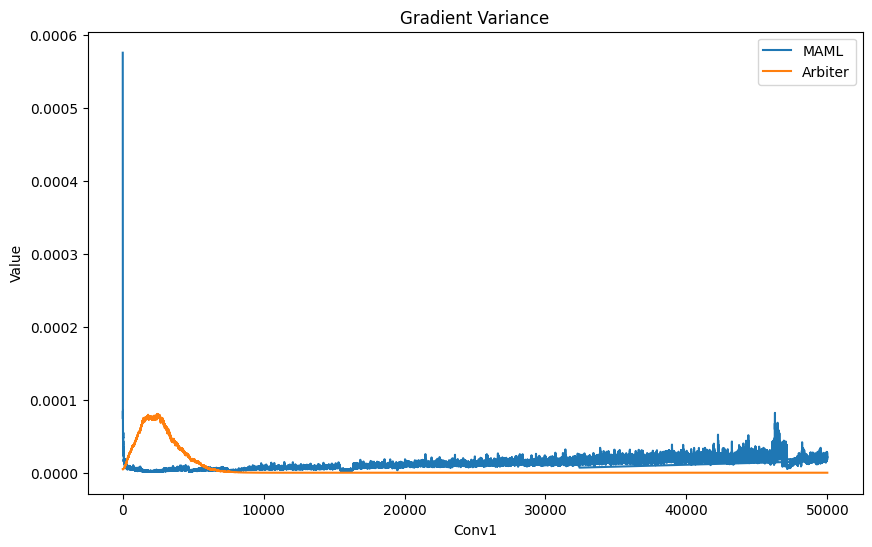

In [25]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

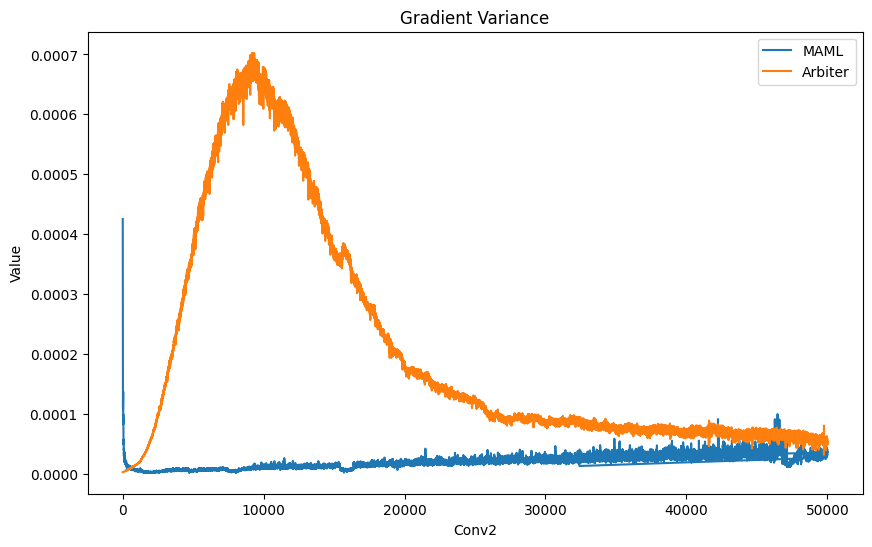

In [26]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv2.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv2.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv2')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

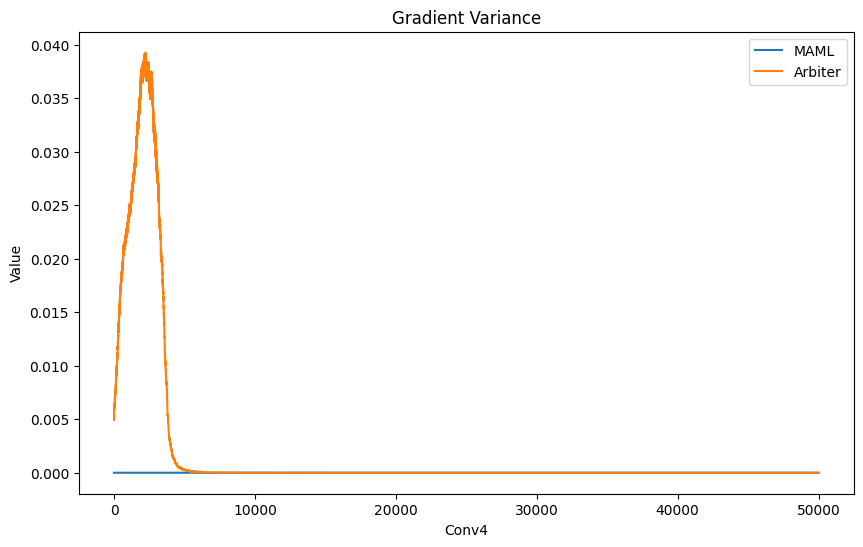

In [27]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.bias_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.bias_grad_var'],label='Arbiter')

plt.xlabel('Conv4')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

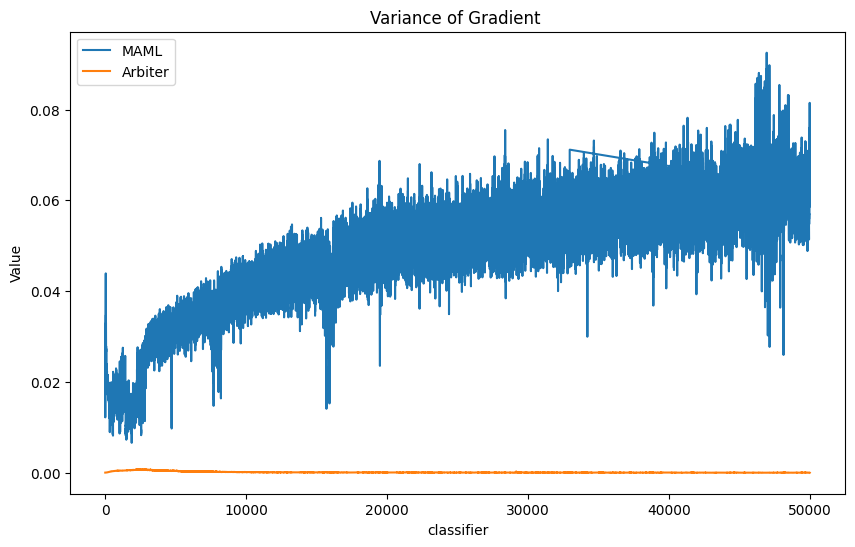

In [28]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_grad_var'],label='Arbiter')

plt.xlabel('classifier')
plt.ylabel('Value')
plt.title('Variance of Gradient ')
plt.legend()

# 6. Weight L2 Norm

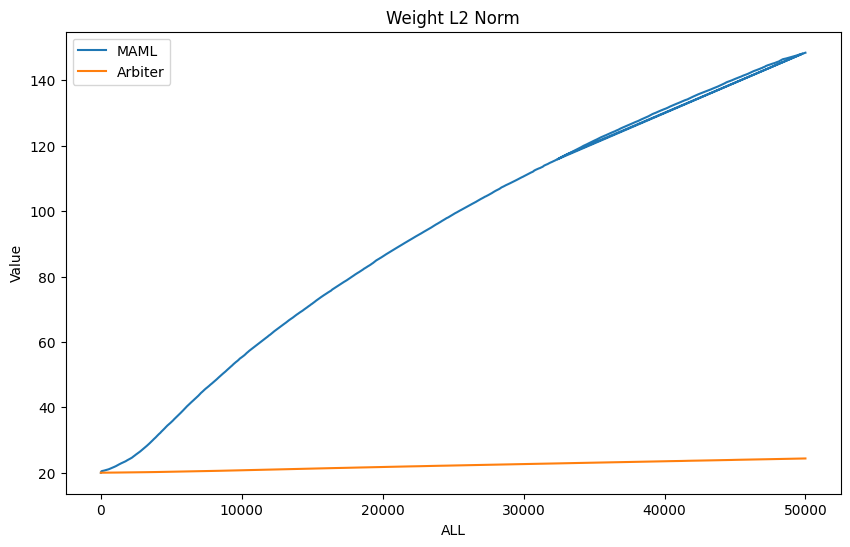

In [29]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_weights_norm'], label='MAML')
plt.plot(arbiter_gr['all_weights_norm'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Weight L2 Norm')
plt.legend()

# 7. Weight Variance

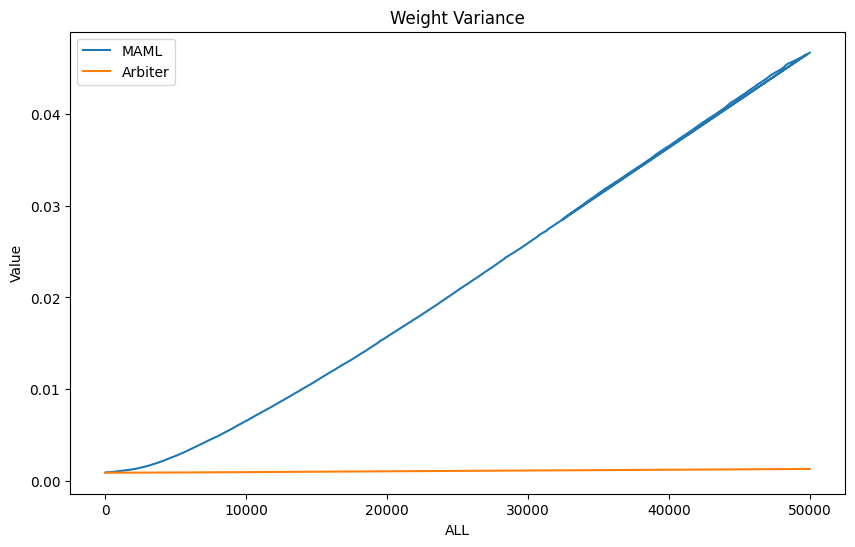

In [30]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_weights_var'], label='MAML')
plt.plot(arbiter_gr['all_weights_var'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Weight Variance')
plt.legend()

# 8. Gradient Mean

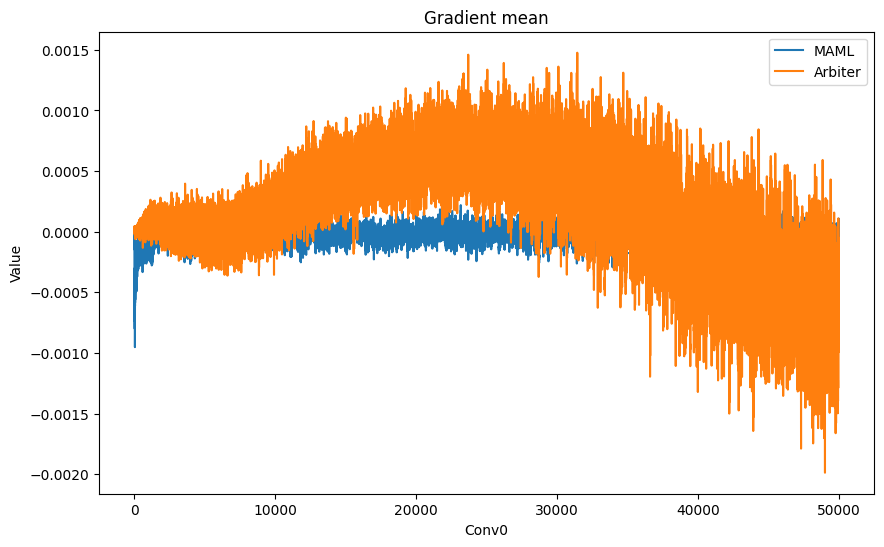

In [31]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_grads_mean'], label='MAML')
plt.plot(arbiter_gr['all_grads_mean'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

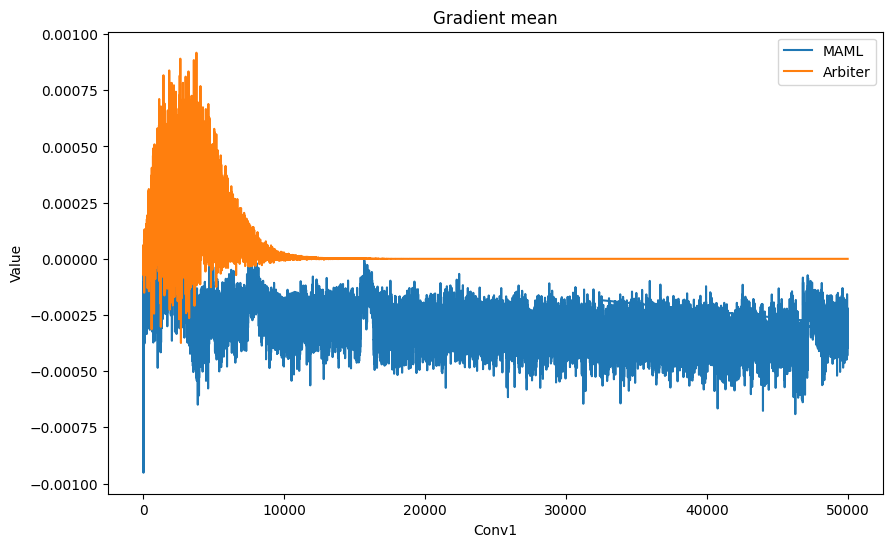

In [32]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

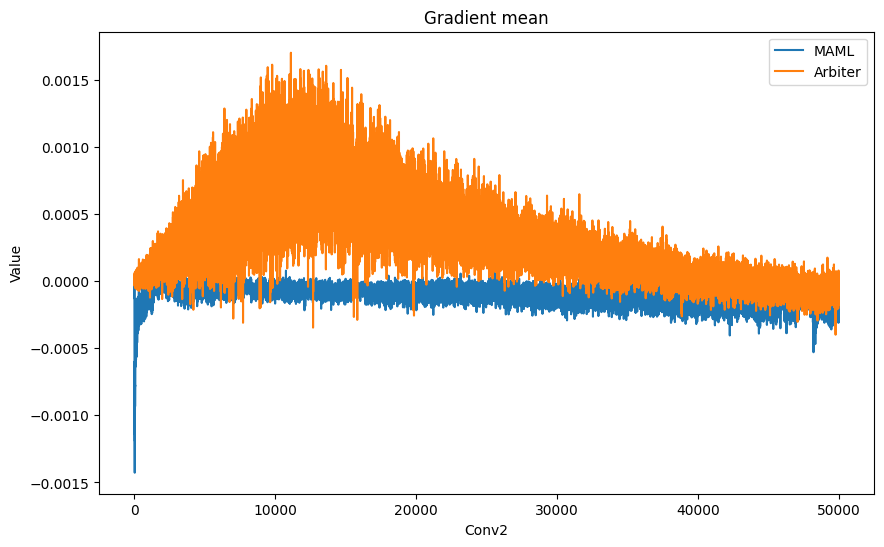

In [33]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv2.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv2.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv2')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

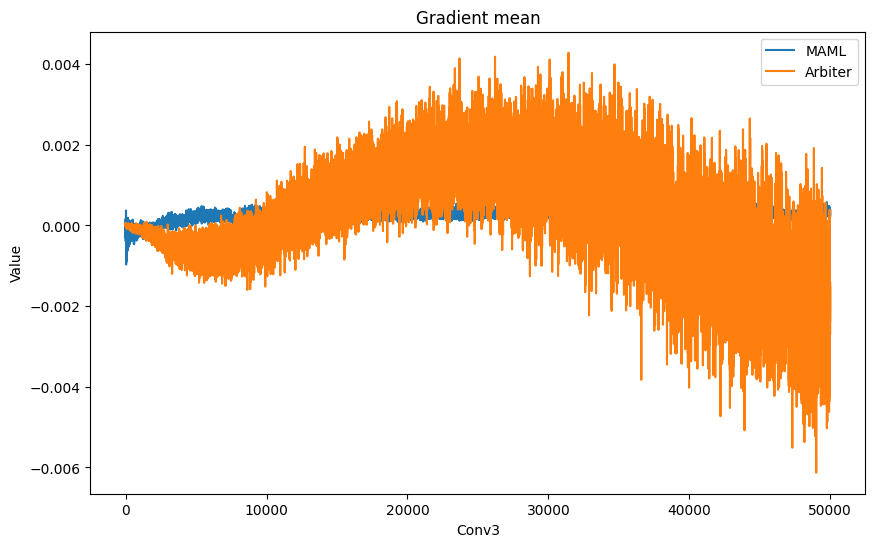

In [34]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv3')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

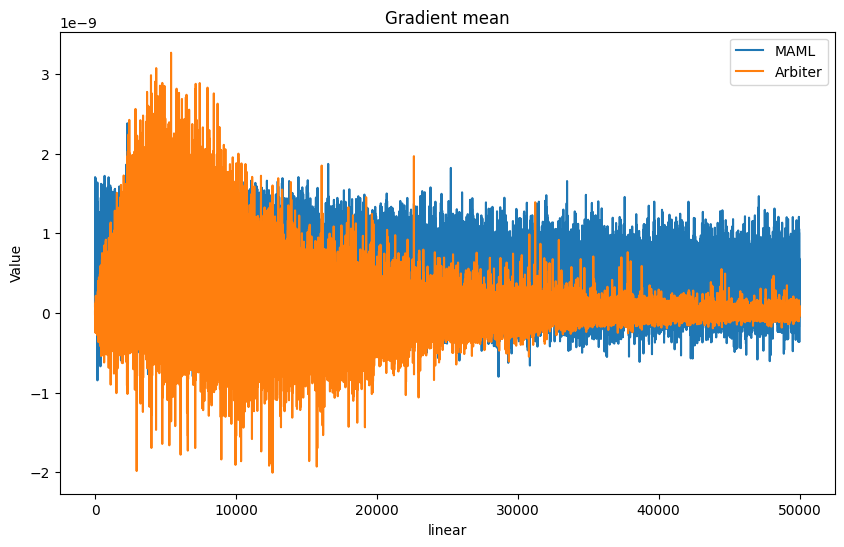

In [35]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_grad_mean'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

# 9. GSNR

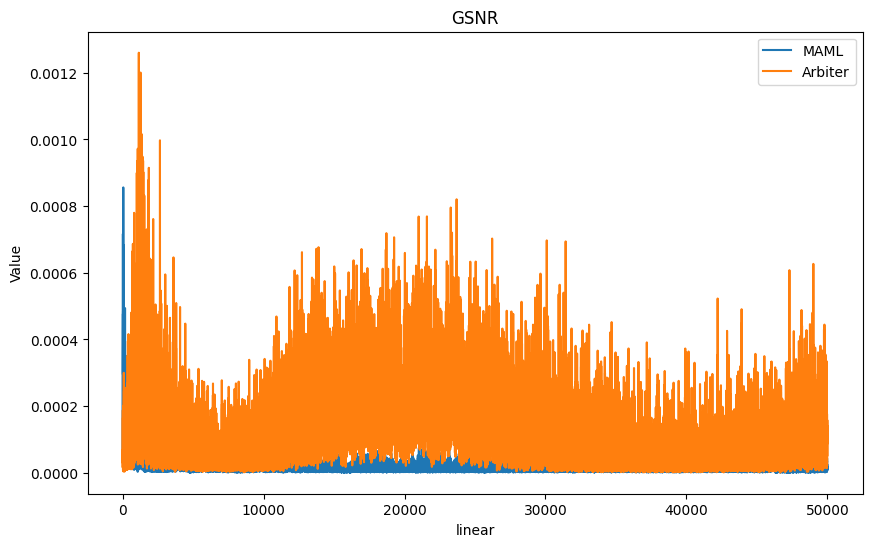

In [36]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['gsnr'], label='MAML')
plt.plot(arbiter_gr['gsnr'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

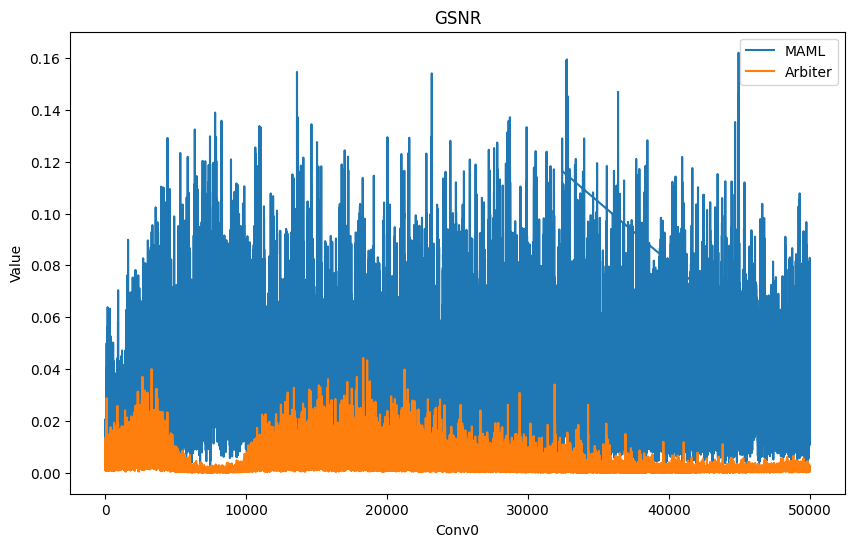

In [37]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv0.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv0.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

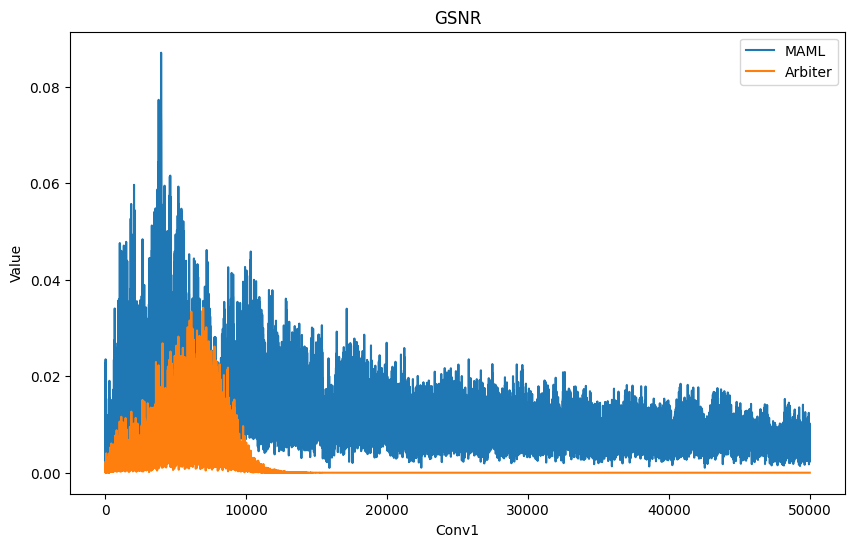

In [38]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

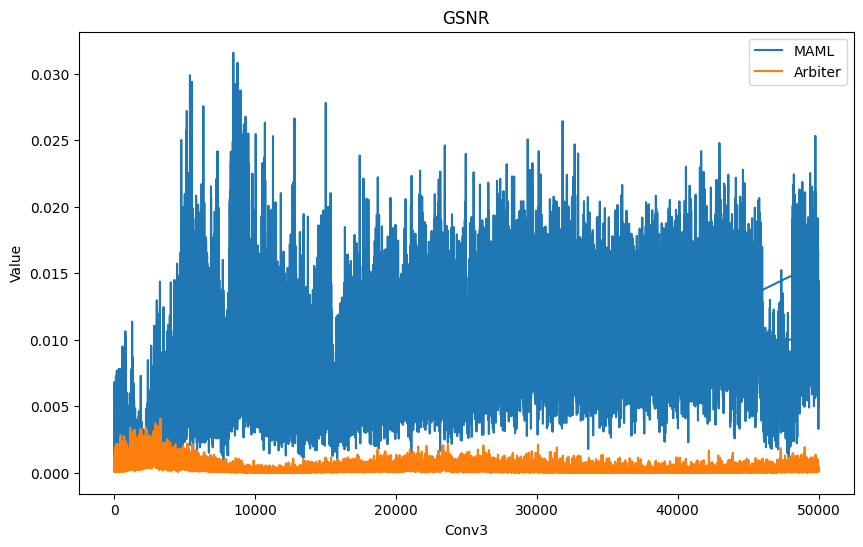

In [39]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv3')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

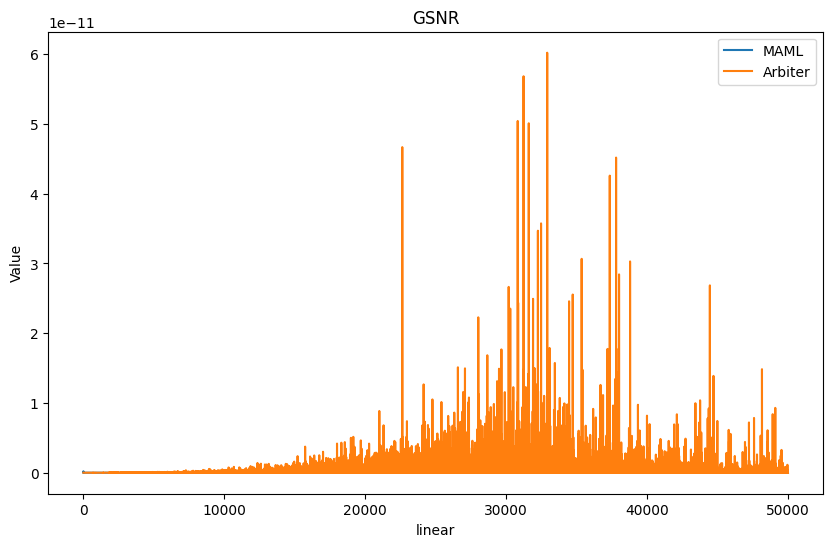

In [40]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_gsnr'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()